In [1]:
import sys
sys.path.append(r'C:\Users\Волочков\mlopen')
from ml_lib.jupyter import often_used_libs,jupyter_style
np,pd,plt,sns=often_used_libs()
jupyter_style()

imported numpy as np
imported pandas as pd
imported seaborn as sns
imported matplotlib.pyplot as plt
%matplotlib inline


![nn](../../img/simple_neural_net.png)
In neural net visuals, circles represent neurons and lines represent synapses. Synapses have a really simple job, they take a value from their input, multiply it by a specific weight, and output the result. Neurons are a little more complicated. Their job is to add together the outputs of all their synapses, and apply an activation function. Certain activation functions allow neural nets to model complex non-linear patterns, that simpler models may miss. For our neural net, we’ll use sigmoid activation functions.
<img src='../../img/simple_neural_net.png' width=200 height=200 />

|Code Symbol | Math Symbol | Definition | Dimensions
    | :-: | :-: | :-: | :-: |
    |X|$$X$$|Input Data, each row in an example| (numExamples, inputLayerSize)|
    |y |$$y$$|target data|(numExamples, outputLayerSize)|
    |W1 | $$W^{(1)}$$ | Layer 1 weights | (inputLayerSize, hiddenLayerSize) |
    |W2 | $$W^{(2)}$$ | Layer 2 weights | (hiddenLayerSize, outputLayerSize) |
    |z2 | $$z^{(2)}$$ | Layer 2 activation | (numExamples, hiddenLayerSize) |
    |a2 | $$a^{(2)}$$ | Layer 2 activity | (numExamples, hiddenLayerSize) |
    |z3 | $$z^{(3)}$$ | Layer 3 activation | (numExamples, outputLayerSize) |
    |J | $$J$$ | Cost | (1, outputLayerSize) |
|dJdz3 | $$\frac{\partial J}{\partial z^{(3)} } = \delta^{(3)}$$ | Partial derivative of cost with respect to $z^{(3)}$ | (numExamples,outputLayerSize)|
    |dJdW2|$$\frac{\partial J}{\partial W^{(2)}}$$|Partial derivative of cost with respect to $W^{(2)}$|(hiddenLayerSize, outputLayerSize)|
    |dz3dz2|$$\frac{\partial z^{(3)}}{\partial z^{(2)}}$$|Partial derivative of $z^{(3)}$ with respect to $z^{(2)}$|(numExamples, hiddenLayerSize)|
    |dJdW1|$$\frac{\partial J}{\partial W^{(1)}}$$|Partial derivative of cost with respect to $W^{(1)}$|(inputLayerSize, hiddenLayerSize)|
    |delta2|$$\delta^{(2)}$$|Backpropagating Error 2|(numExamples,hiddenLayerSize)|
    |delta3|$$\delta^{(3)}$$|Backpropagating Error 1|(numExamples,outputLayerSize)|

Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron. This is a complex operation, but if we take the three outputs we're looking for as a single row of a matrix, and place all our individual weights into a matrix of weights, we can create the exact behavior we need by multiplying our input data matrix by our weight matrix. Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. From here on out, we'll refer to these matrics as X, W one, and z two, where z two the activity of our second layer. Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit.
    
We now have our first official formula, $z^{(2)} = XW^{(1)}$. Matrix notation is really nice here, becuase it allows us to express the complex underlying process in a single line!

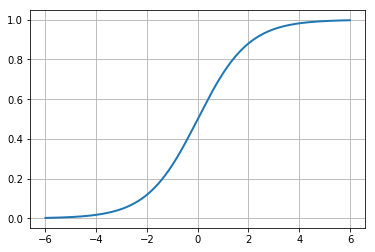

In [2]:
#Apply sigmoid activation function to scalar, vector, or matrix
sigmoid=lambda z:1/(1+np.exp(-z))

testInput = np.arange(-6,6,0.01)
plt.plot(testInput, sigmoid(testInput), linewidth= 2)
plt.grid(1)

In [3]:
sigmoid(np.array([-1,0,1]))

array([ 0.26894142,  0.5       ,  0.73105858])

 We now have our second formula for forward propagation, using f to denote our activation function, we can write that a two, our second layer activity, is equal to f of z two. a two will be a matrix of the same size as z two, 3 by 3
 
 $$
    a^{(2)} = f(z^{(2)}) 
  $$
  
  To finish forward propagation we need to propagate a two all the way to the output, yhat. We've already done the heavy lifting in the previous layer, so all we have to do now is multiply a two by our senond layer weights W2 and apply one more activation funcion. W2 will be of size 3x1, one weight for each synapse. Multiplying a2, a 3 by 3, by W2, a 3 by 1 results in a 3 by 1 matrix z three, the activity or our third layer. z3 has three activity values, one for each example. Last but not least, we'll apply our activation function to z three yielding our official estimate of your test score, yHat
  
$$
    \hat{y} = f(z^{(3)}) 
    $$
    
We need to implement our forward propagation formulas in python. First we'll initialize our weight matrices in our init method. For starting values, we'll use random numbers.
We'll implement forward propagation in our forward method, using numpy's built in dot method for matrix multiplication and our own sigmoid method    

In [21]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
        
    def forward(self, X):
        #Propagate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))

Lets try to predict student's test score if we now number of hours sleeping and studying before test

In [22]:
# X = (hours sleeping, hours studying), y = Score on test
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([0.75], [0.82], [0.93]), dtype=float)
NN=Neural_Network()
y_hat=NN.forward(X)

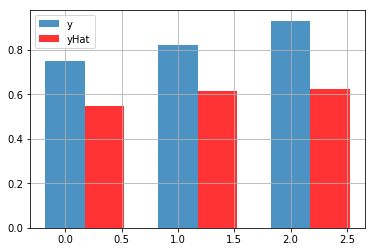

In [23]:
#Compare estimate, yHat, to actually score
plt.bar([0,1,2], y, width = 0.35, alpha=0.8)
plt.bar([0.35,1.35,2.35],y_hat, width = 0.35, color='r', alpha=0.8)
plt.grid(1)
plt.legend(['y', 'yHat']);

Right now our predictions are pretty inaccurate. To improve our model, we first need to quantify exactly how wrong our predictions are. We'll do this with a cost function. A cost function allows us to express exactly how wrong or "costly" our models is, given our examples.

One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler down the road. Now that we have a cost, or job is to minimize it. When someone says they’re training a network, what they really mean is that they're minimizing a cost function.
$$ J = \sum \frac{1}{2}(y-\hat{y})^2 $$

OUR cost is a function of two things, our examples, and the weights on our synapses. We don't have much control of our data, so we'll minimize our cost by changing the weights.

Conceptually, this is pretty simple concept. We have a collection of 9 individual weights, and we're saying that there is some combination of w's that will make our cost, J, as small as possible. When I first saw this problem in machine learning, I thought, I'll just try ALL THE WEIGHTS UNTIL I FIND THE BEST ONE! After all I have a computer!

Enter the CURSE OF DIMENSIONALITY. Here's the problem. Let's pretend for a second that we only have 1 weight, instead of 9. To find the ideal value of our weight that will minimize our cost, we need to try a bunch of values for W, let's say we test 1000 values. That doesn't seem so bad, after all, my computer is pretty fast.

## Gradient descent

And since we have one big equation that uniquely determines our cost, J, from X, y, W1, and W2, we can use our good friend calculus to find what we're looking for. We want to know "which way is downhill", that is, what is the rate of change of J with respect to W, also known as the derivative. And in this case, since we’re just considering one weight at a time, the partial derivative.


We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill.
Now we can really speed things up. Since we know in which direction the cost decreases, we can save all that time we would have spent searching in the wrong direction. We can save even more computational time by iteratively taking steps downhill and stopping when the cost stops getting smaller.


This method is known as gradient descent, and although it may not seem so impressive in one dimension, it is capable of incredible speedups in higher dimensions. In fact, in our final video, we’ll show that what would have taken 10^27 function evaluations with our brute force method will take less than 100 evaluations with gradient descent. Gradient descent allows us to find needles in very very very large haystacks


Now before we celebrate too much here, there is a restriction. What if our cost function doesn't always go in the same direction? What if it goes up, then back down? The mathematical name for this is non-convex, and it could really throw off our gradient descent algorithm by getting it stuck in a local minima instead of our ideal global minima. One of the reasons we chose our cost function to be the sum of squared errors was to exploit the convex nature of quadratic equations.
We know that the graph of y equals x squared is a nice convex parabola and it turns out that higher dimensional versions are too!


Another piece of the puzzle here is that depending on how we use our data, it might not matter if or cost function is convex or not. If we use our examples one at a time instead of all at once, sometimes it won't matter if our cost function is convex, we will still find a good solution. This is called stochastic gradient descent.
$$z^{(2)}=XW^{(1)}$$
$$a^{(2)}=f(z^{(2)})$$
$$z^{(3)}=a^{(2)}W^{(2)}$$
$$\hat{y} = f(z^{(3)}) $$
$$ J = \sum \frac{1}{2}(y-\hat{y})^2 $$

We need to calculate :$\frac{\partial J}{\partial W}$

$$
W^{(1)}=
\begin{bmatrix}
    W_{11}^{(1)}       & W_{12}^{(1)} & W_{13}^{(1)} \\
    W_{21}^{(1)}      & W_{22}^{(1)} & W_{23}^{(1)} 
\end{bmatrix},
\frac{\partial J}{\partial W^{(1)}}=
\begin{bmatrix}
    \frac{\partial J}{\partial W_{11}^{(1)}}  & \frac{\partial J}{\partial W_{12}^{(1)}} & \frac{\partial J}{\partial W_{13}^{(1)}} \\
        \frac{\partial J}{\partial W_{21}^{(1)}} & \frac{\partial J}{\partial W_{22}^{(1)}} & \frac{\partial J}{\partial W_{23}^{(1)}} 
\end{bmatrix}
$$


$$W^{(2)}=
\begin{bmatrix}
    W_{11}^{(2)}    \\
    W_{12}^{(2)}   \\  
    W_{13}^{(2)}     
\end{bmatrix},
\frac{\partial J}{\partial W^{(2)}}=
\begin{bmatrix}
   \frac{\partial J}{\partial W_{11}^{(2)}}    \\
    \frac{\partial J}{\partial W_{12}^{(2)}}   \\  
   \frac{\partial J}{\partial W_{13}^{(2)}}     
\end{bmatrix}
$$


$$\frac{\partial J}{\partial W^{(2)}}= \sum -(y-\hat{y})\frac{\partial \hat{y}}{\partial W^{(2)}}= \sum -(y-\hat{y}) f^{'}(z^{(3)})  \frac{\partial z^{(3)}}{\partial W^{(2)}}=\sum -(y-\hat{y}) f^{'}(z^{(3)}) a^{(2)}  $$

Let's consider $-(y-\hat{y}) f^{'}(z^{(3)})$

$$\begin{bmatrix}
   -y_1+\hat{y}_1   \\
   -y_2+\hat{y}_2   \\
   -y_3+\hat{y} _3    
\end{bmatrix}
\begin{bmatrix}
   f^{'}(z_1^{(3)}) \\
    f^{'}(z_2^{(3)}) \\
    f^{'}(z_3^{(3)}) 
\end{bmatrix}=
\begin{bmatrix}
   \delta_1^{(3)} \\
    \delta_2^{(3)} \\
    \delta_3^{(3)}
\end{bmatrix}=\delta^{(3)} \text {   -back propagated error}
$$

$$ a^{(2)}=
\begin{bmatrix}
    a_{11}^{(2)}       & a_{12}^{(2)} & a_{13}^{(2)} \\
    a_{21}^{(2)}       & a_{22}^{(2)} & a_{23}^{(2)} \\
    a_{31}^{(2)}       & a_{32}^{(2)} & a_{33}^{(2)}
\end{bmatrix}
$$

to multiply $\delta^{(3)}$ and  $ a^{(2)} $ we need to transpose matrix  $ a^{(2)} $ [Scalar-by-matrix](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-matrix)

$$\frac{\partial J}{\partial W^{(2)}}=
\begin{bmatrix}
   \delta_1^{(3)} \\
    \delta_2^{(3)} \\
    \delta_3^{(3)}
\end{bmatrix}
\begin{bmatrix}
    a_{11}^{(2)}       & a_{12}^{(2)} & a_{13}^{(2)} \\
    a_{21}^{(2)}       & a_{22}^{(2)} & a_{23}^{(2)} \\
    a_{31}^{(2)}       & a_{32}^{(2)} & a_{33}^{(2)}
\end{bmatrix}
$$

after transposing:
$$\frac{\partial J}{\partial W^{(2)}}=
\begin{bmatrix}
    a_{11}^{(2)}       & a_{21}^{(2)} & a_{31}^{(2)} \\
    a_{12}^{(2)}       & a_{22}^{(2)} & a_{32}^{(2)} \\
    a_{13}^{(2)}       & a_{23}^{(2)} & a_{33}^{(2)}
\end{bmatrix}
\begin{bmatrix}
   \delta_1^{(3)} \\
    \delta_2^{(3)} \\
    \delta_3^{(3)}
\end{bmatrix}
$$

#### sum up
$$\frac{\partial J}{\partial W^{(2)}}=(a^{(2)})^T \delta ^{(3)}$$
$$\delta ^{(3)}= -(y-\hat{y}) f^{'}(z^{(3)}) $$

$$\frac{\partial J}{\partial W^{(1)}}= \sum -(y-\hat{y})\frac{\partial \hat{y}}{\partial W^{(1)}}= \sum -(y-\hat{y}) f^{'}(z^{(3)})  \frac{\partial z^{(3)}}{\partial W^{(1)}}=\sum -(y-\hat{y}) f^{'}(z^{(3)})\frac{\partial a^{(2)}}{\partial W^{(1)}}  W^{(2)}=\sum \delta ^{(3)} (W^{(2)})^T \frac{\partial a^{(2)}}{\partial W^{(1)}} = ...  $$
$$...=\sum \delta ^{(3)} (W^{(2)})^T \frac{\partial a^{(2)}}{\partial W^{(1)}} =\sum \delta ^{(3)} (W^{(2)})^T f^{'}(z^{(2)}) \frac{\partial XW^{(1)}}{\partial W^{(1)}} =\sum \delta ^{(3)} (W^{(2)})^T f^{'}(z^{(2)}) X^{T}$$
$$\delta ^{(2)}=\sum \delta ^{(3)} (W^{(2)})^T f^{'}(z^{(2)})$$
So,
$$\frac{\partial J}{\partial W^{(1)}}=X^{T}\delta ^{(2)}$$

Now is a good time to add a new python method for the derivative of our sigmoid function, sigmoid Prime. Our derivative should be the largest where our sigmoid function is the steepest, at the value z equals zero.

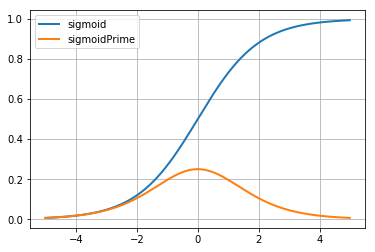

In [7]:
def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

testValues = np.arange(-5,5,0.01)
plt.plot(testValues, sigmoid(testValues), linewidth=2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime']);

Another way to think about what’s happening here is that is that each example our algorithm sees has a certain cost and a certain gradient. The gradient with respect to each example pulls our gradient descent algorithm in a certain direction. It's like every example gets a vote on which way is downhill, and when we perform batch gradient descent we just add together everyone’s vote, call it downhill, and move in that direction.


We’ll code up our gradients in python in a new method, cost function prime. Numpy’s multiply method performs element-wise multiplication, and the dot method performs matrix multiplication.

In [8]:
# Part of NN Class (won't work alone, needs to be included in class as 
# shown in below and in partFour.py):

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

All that’s left is to code this equation up in python. What’s cool here is that if we want to make a deeper neural network, we could just stack a bunch of these operations together.

In [24]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

So how should we change our W’s to decrease our cost? We can now compute dJ/dW, which tells us which way is uphill in our 9 dimensional optimization space.

In [25]:
NN = Neural_Network()
cost1 = NN.costFunction(X,y)

In [26]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
dJdW1

array([[ 0.08543203, -0.02136498,  0.0048385 ],
       [ 0.05837304, -0.00538806,  0.00156592]])

In [27]:
dJdW2

array([[-0.09464871],
       [-0.00300661],
       [-0.00066575]])

If we move this way by adding a scalar times our derivative to our weights, our cost will increase, and if we do the opposite, subtract our gradient from our weights, we will move downhill and reduce our cost. This simple step downhill is the core of gradient descent and a key part of how even very sophisticated learning algorithms are trained.

In [49]:
scalar = -0.001
NN.W1 = NN.W1 + scalar*dJdW1
NN.W2 = NN.W2 + scalar*dJdW2
cost2 = NN.costFunction(X,y)

In [50]:
cost1, cost2

(array([ 0.25123412]), array([ 0.25164457]))